In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [2]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In this exercise, you will work with the “Blues Guitarists Hand Posture and Thumbing Style by Region and Birth Period” data. This dataset has 93 entries of various blues guitarists born between 1874 and 1940. Apart from the name of the guitarists, that dataset contains the following four features:

***Dataset columns descriptions***

| Regions| Description | 
| --- | --- | 
|  1 | East | 
|  2 | Delta | 
|  3 | Texas | 



|Years | Description|
| --- | --- |
| 0  | For those born before 1906 |
| 1 | For the rest |


|Hand postures| Description|
| --- | --- |
| 1| Extended |
| 2 | Stacked |
| 3 | Lutiform |


|Thumb styles: Between 1 and 3  | Description|
| --- | --- |
| 1 | Alternating |
| 2 | Utility |
| 3 | Dead |

In [3]:
df = pd.read_csv('~/UW/IMT_574/Week4/Homework/blues_hand.csv')
df.head()

,name,state,brthYr,post1906,region,handPost,thumbSty
0,Henry Thomas,TX,1874,0,3,1,3
1,Frank Stokes,TN,1887,0,2,1,3
2,Sam Collins,MS,1887,0,2,1,2
3,Peg Leg Howell,GA,1888,0,1,2,2
4,Huddie Ledbetter,TX,1888,0,3,2,3


In [4]:
guitarrist_data_for_model = df.copy()

In [5]:
#Renaming columns
guitarrist_data_for_model.rename(columns={'name':'Name', 'state':'State', 'brthYr':"Birth_Year", 'post1906':'Post_1906'
                                          ,'region':'Region', 'handPost': 'Hand_Posture', 'thumbSty':'Thumb_Styles' },  inplace=True)


guitarrist_data_for_model.head()

,Name,State,Birth_Year,Post_1906,Region,Hand_Posture,Thumb_Styles
0,Henry Thomas,TX,1874,0,3,1,3
1,Frank Stokes,TN,1887,0,2,1,3
2,Sam Collins,MS,1887,0,2,1,2
3,Peg Leg Howell,GA,1888,0,1,2,2
4,Huddie Ledbetter,TX,1888,0,3,2,3


In [6]:
#Checking for missing values to impute
guitarrist_data_for_model.isna().any()

Name            False
State           False
Birth_Year      False
Post_1906       False
Region          False
Hand_Posture    False
Thumb_Styles    False
dtype: bool

In [7]:
guitarrist_data_for_model.dtypes

Name            object
State           object
Birth_Year       int64
Post_1906        int64
Region           int64
Hand_Posture     int64
Thumb_Styles     int64
dtype: object

In [8]:
def get_metrics(y_test, y_pred, legend):
    mse = mean_squared_error(y_test, y_pred)
    mae  = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(legend)
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R2): {r2}")

In [9]:
def plot_graphs(model, legend):
    plt.figure()
    plot_tree(model, filled=True)
    plt.title(legend)
    plt.show()

***Step 1***

Using decision tree on this dataset, how accurately you can tell their birth year from their hand postures and thumb styles. How does it affect the evaluation when you include the region while training the model?

In [10]:
#Splitting training(70%) and testing data (30%)
X_a = guitarrist_data_for_model[['Hand_Posture', 'Thumb_Styles']].copy()
y_a = guitarrist_data_for_model.Birth_Year.copy()

X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_a, y_a, test_size=0.3, random_state=20)

In [11]:
regression_model_a = DecisionTreeRegressor(max_depth=2)

In [12]:
regression_model_a.fit(X_train_a, y_train_a)

DecisionTreeRegressor(max_depth=2)

In [13]:
y_pred_a = regression_model_a.predict(X_test_a)
y_pred_a

array([1908.425     , 1908.425     , 1908.425     , 1913.28571429,
       1908.425     , 1908.425     , 1913.28571429, 1904.        ,
       1904.        , 1904.        , 1913.28571429, 1908.425     ,
       1904.        , 1904.        , 1908.425     , 1908.425     ,
       1904.        , 1908.425     , 1908.425     , 1908.425     ,
       1908.425     , 1904.        , 1908.425     , 1913.28571429,
       1904.        , 1904.        , 1904.        , 1908.425     ])

In [14]:
get_metrics(y_test_a, y_pred_a,"Scores for decision tree trained on Hand_Posture and Thumb_Styles features:")

Scores for decision tree trained on Hand_Posture and Thumb_Styles features:
Mean Squared Error (MSE): 272.80018859329476
Mean Absolute Error (MAE): 12.836734693877556
R-squared (R2): 0.007723170376064292


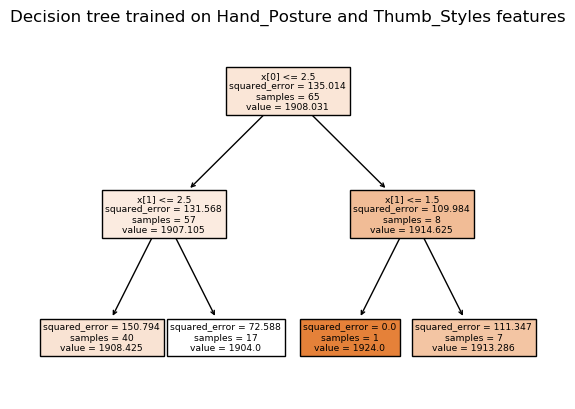

In [15]:
plot_graphs(regression_model_a, "Decision tree trained on Hand_Posture and Thumb_Styles features")

In [16]:
#Adding Region
X_b = guitarrist_data_for_model[['Hand_Posture', 'Thumb_Styles', 'Region']].copy()
y_b = guitarrist_data_for_model.Birth_Year.copy()

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_b, y_b, test_size=0.3, random_state=20)


In [17]:
regression_model_b = DecisionTreeRegressor(max_depth=2)

In [18]:
regression_model_b.fit(X_train_b, y_train_b)


DecisionTreeRegressor(max_depth=2)

In [19]:
y_pred_b = regression_model_b.predict(X_test_b)
y_pred_b

array([1910.16      , 1910.16      , 1904.71875   , 1912.14285714,
       1904.71875   , 1910.16      , 1932.        , 1904.71875   ,
       1904.71875   , 1910.16      , 1912.14285714, 1904.71875   ,
       1910.16      , 1904.71875   , 1904.71875   , 1904.71875   ,
       1910.16      , 1910.16      , 1910.16      , 1904.71875   ,
       1904.71875   , 1904.71875   , 1910.16      , 1912.14285714,
       1904.71875   , 1904.71875   , 1904.71875   , 1904.71875   ])

In [20]:
get_metrics(y_test_b, y_pred_b,"Scores for decision tree trained on Hand_Posture,Thumb_Styles and Region features:")

Scores for decision tree trained on Hand_Posture,Thumb_Styles and Region features:
Mean Squared Error (MSE): 313.02323742597457
Mean Absolute Error (MAE): 13.381881377551021
R-squared (R2): -0.13858317779513807


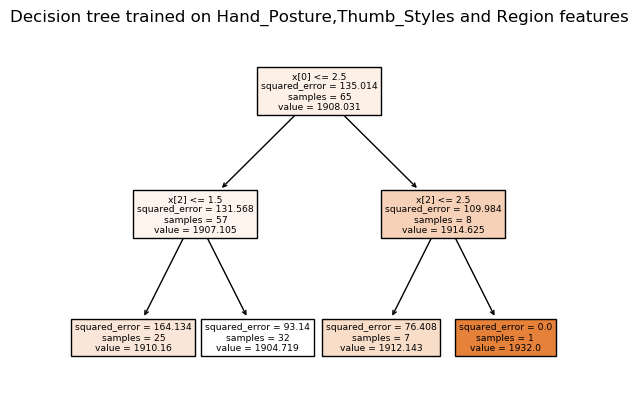

In [21]:
plot_graphs(regression_model_b, "Decision tree trained on Hand_Posture,Thumb_Styles and Region features")

---

***Step 2***

Now do the same using random forest (in both of the above cases) and report the difference. Make sure to use appropriate training-testing parameters for your evaluation.

In [22]:
#Hyperparameters
depth = 5
num_estimators=10

***Random forest trained on Hand_Posture and Thumb_Styles features***

In [23]:
rf_regression_model_a = RandomForestRegressor(n_estimators=num_estimators, max_depth=depth)
rf_regression_model_a.fit(X_train_a, y_train_a)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [24]:
predictions_rf_a = rf_regression_model_a.predict(X_test_a)

In [25]:
#R-squared  = > The nearer to 1, the better
get_metrics(y_test_a, predictions_rf_a,"Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=5")

Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=5
Mean Squared Error (MSE): 257.7394641583806
Mean Absolute Error (MAE): 12.786512954811988
R-squared (R2): 0.06250468636832907


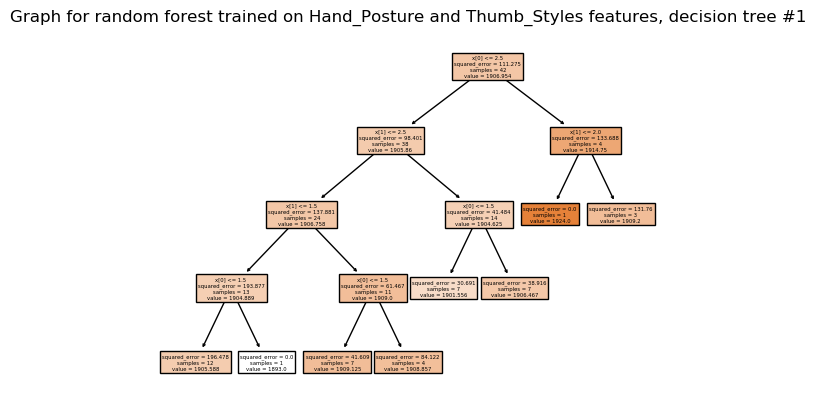

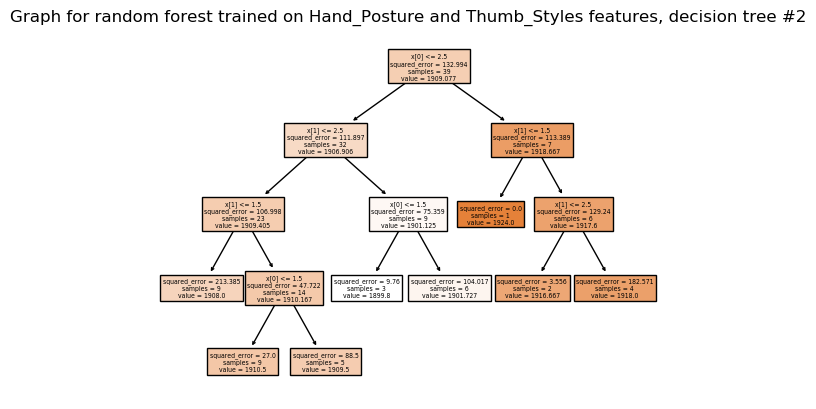

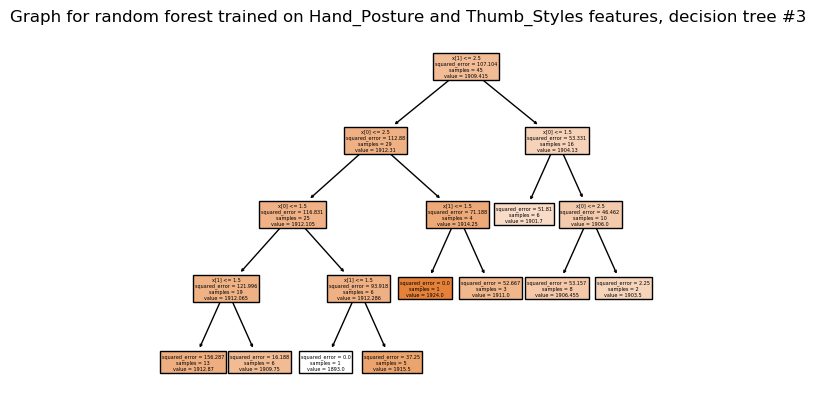

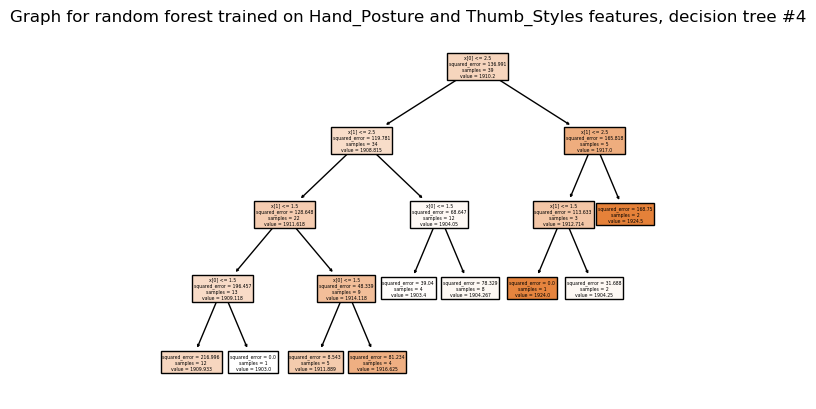

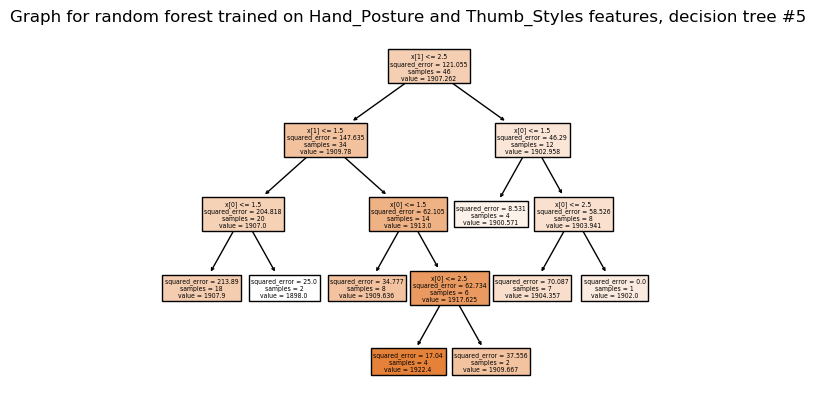

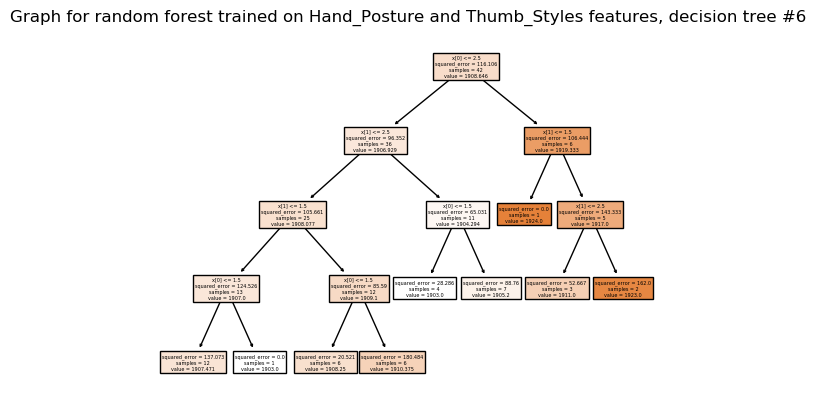

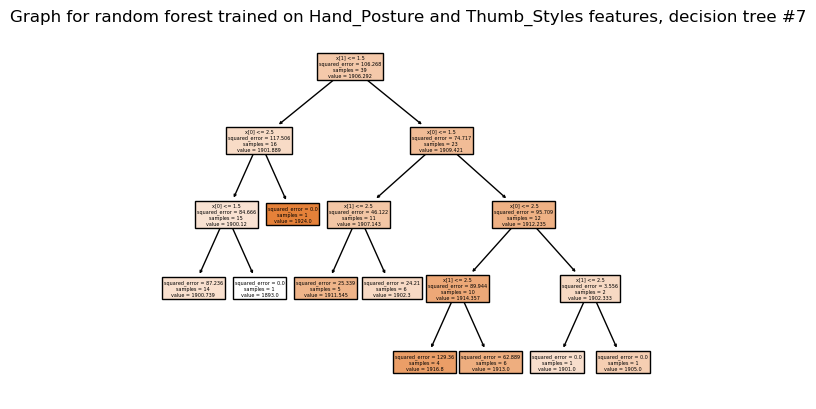

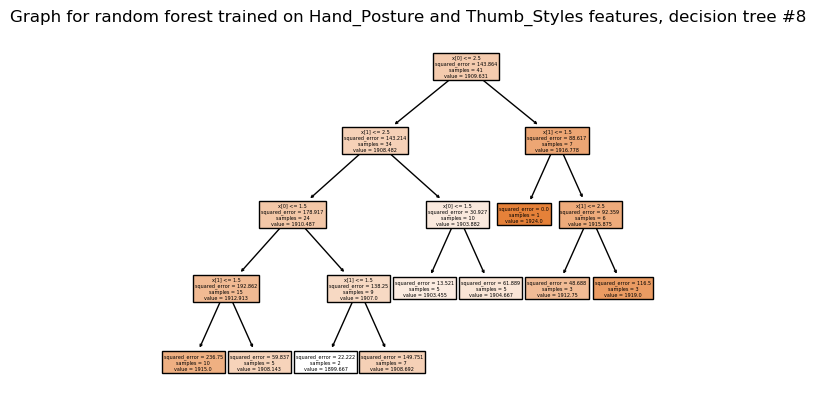

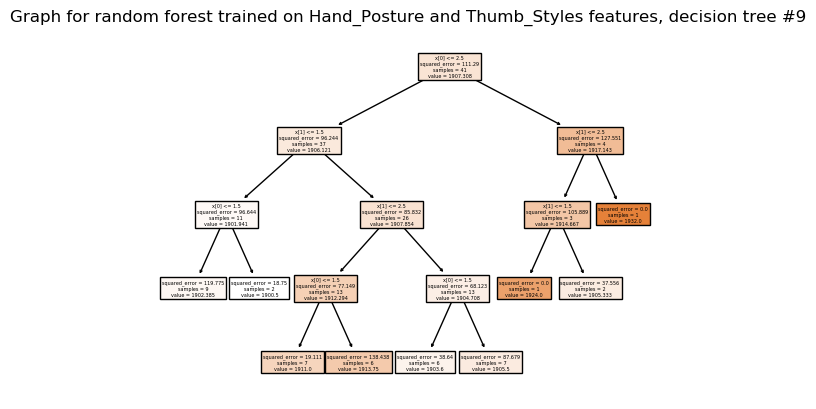

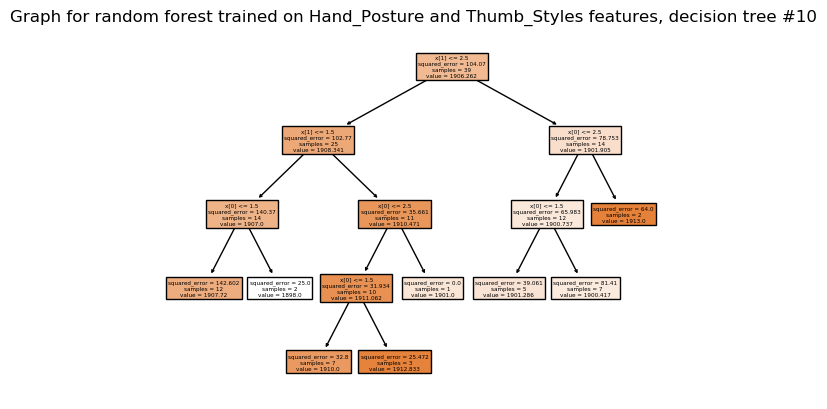

In [26]:
for i in range(num_estimators):
    plot_graphs(rf_regression_model_a.estimators_[i], "Graph for random forest trained on Hand_Posture and Thumb_Styles features, decision tree #" + str(i+1))

***Random forest trained on Hand_Posture,Thumb_Styles and Region features***

In [27]:
rf_regression_model_b = RandomForestRegressor(n_estimators=num_estimators, max_depth=depth)
rf_regression_model_b.fit(X_train_b, y_train_b)

RandomForestRegressor(max_depth=5, n_estimators=10)

In [28]:
predictions_rf_b = rf_regression_model_b.predict(X_test_b)

In [29]:
#R-squared  = > The nearer to 1, the better
get_metrics(y_test_a, predictions_rf_b,"Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=5")

Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=5
Mean Squared Error (MSE): 290.1024649230601
Mean Absolute Error (MAE): 13.664831492911828
R-squared (R2): -0.05521171244167733


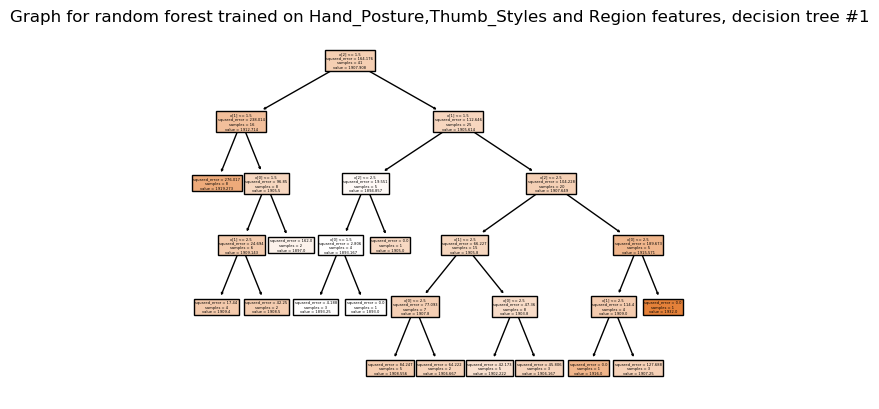

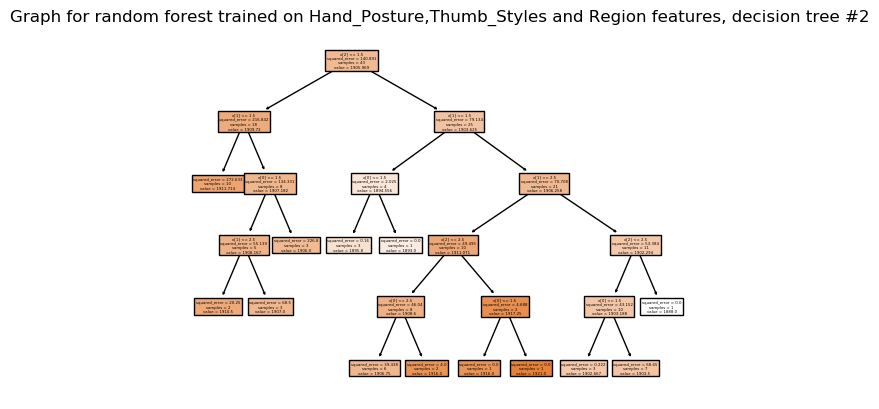

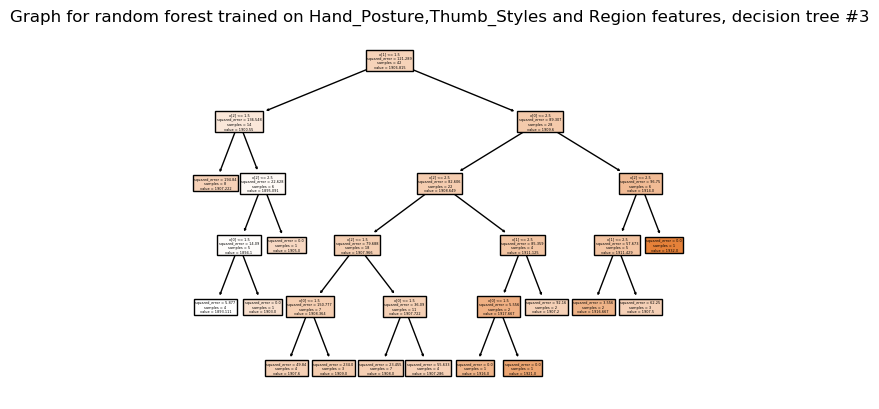

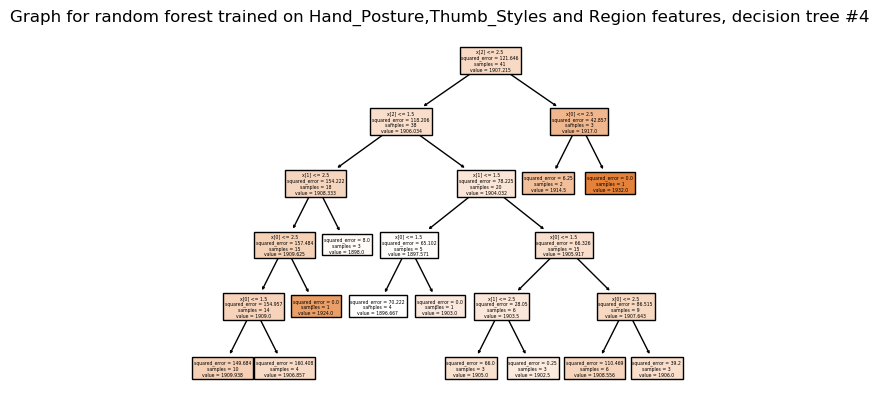

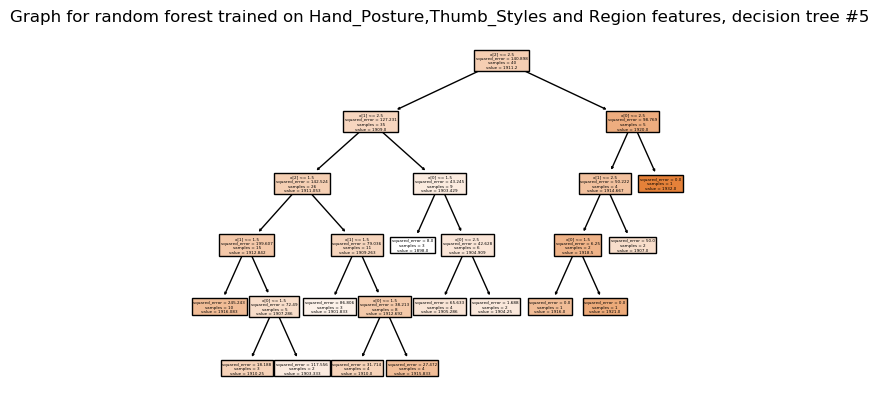

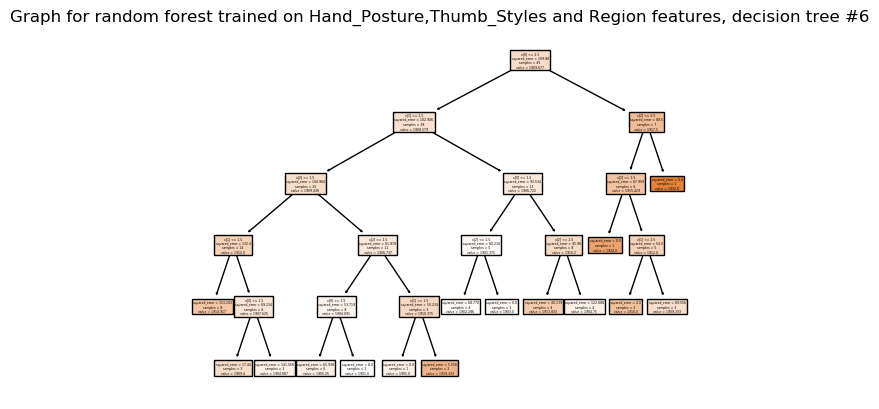

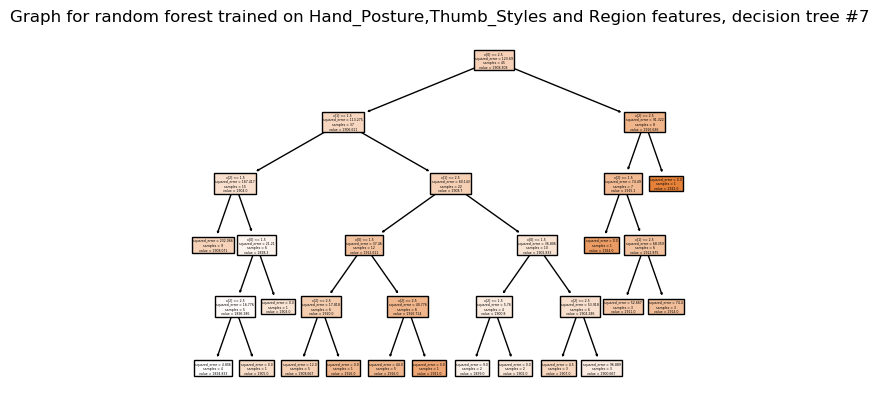

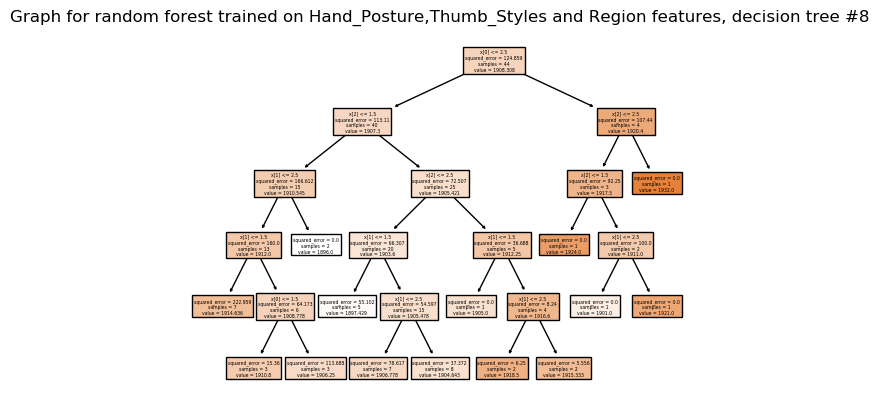

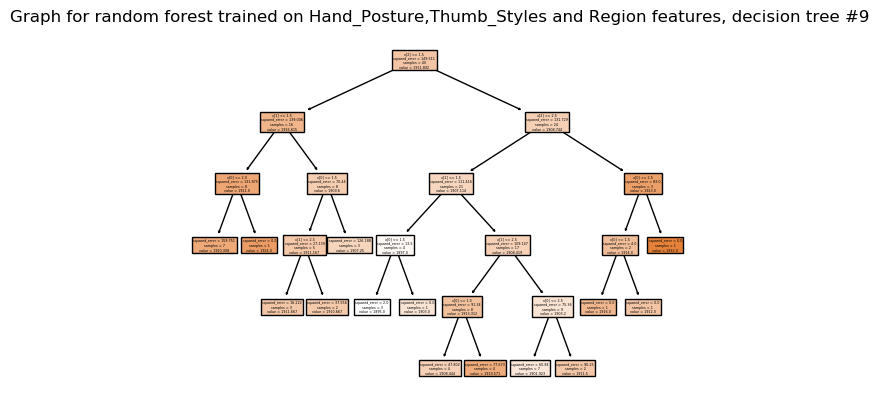

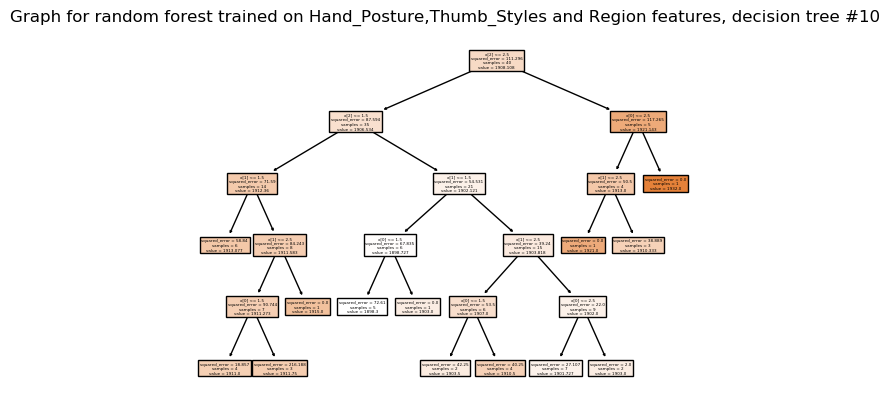

In [30]:
for i in range(num_estimators):
    plot_graphs(rf_regression_model_b.estimators_[i], "Graph for random forest trained on Hand_Posture,Thumb_Styles and Region features, decision tree #" + str(i+1))

You should also run the algorithms multiple times, measure various accuracies, and report the average (and perhaps the range).

In [31]:
depths = [20,30,40,50,60,70,80]
for d in depths:
    rf_regression_model_a = RandomForestRegressor(n_estimators=num_estimators, max_depth=d)
    rf_regression_model_a.fit(X_train_a, y_train_a)
    predictions_rf_a = rf_regression_model_a.predict(X_test_a)
    get_metrics(y_test_a, predictions_rf_a,"Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=" + str(d)+":")
    print("")

Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=20:
Mean Squared Error (MSE): 259.87630042619315
Mean Absolute Error (MAE): 12.592228900376588
R-squared (R2): 0.05473220964027359

Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=30:
Mean Squared Error (MSE): 261.795608778333
Mean Absolute Error (MAE): 12.804816033201982
R-squared (R2): 0.04775096370876364

Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=40:
Mean Squared Error (MSE): 271.48587165165145
Mean Absolute Error (MAE): 13.103592638809946
R-squared (R2): 0.012503835135498131

Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=50:
Mean Squared Error (MSE): 272.2046839726096
Mean Absolute Error (MAE): 13.19297091703194
R-squared (R2): 0.009889244527577778

Scores for random forest trained on Hand_Posture,Thumb_Styles features, MaxDepth=60:
Mean Squared Error (MSE): 265.63710937821855
Mean Absolute Error 

In [32]:
depths = [20,30,40,50,60,70,80]
for d in depths:
    rf_regression_model_b = RandomForestRegressor(n_estimators=num_estimators, max_depth=d)
    rf_regression_model_b.fit(X_train_b, y_train_b)
    predictions_rf_b = rf_regression_model_b.predict(X_test_b)
    get_metrics(y_test_b, predictions_rf_b,"Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=" + str(d)+":")
    print("")

Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=20:
Mean Squared Error (MSE): 288.736148195042
Mean Absolute Error (MAE): 13.684080238370663
R-squared (R2): -0.05024190491283709

Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=30:
Mean Squared Error (MSE): 270.3373659534883
Mean Absolute Error (MAE): 13.191611152036614
R-squared (R2): 0.01668138207509129

Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=40:
Mean Squared Error (MSE): 279.74749543413185
Mean Absolute Error (MAE): 13.46416646553733
R-squared (R2): -0.017546796048804714

Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=50:
Mean Squared Error (MSE): 282.3648386758162
Mean Absolute Error (MAE): 13.710544083892346
R-squared (R2): -0.0270670572600904

Scores for random forest trained on Hand_Posture,Thumb_Styles and Region features, MaxDepth=60:
Mean Squar